In [1]:
import json
from matplotlib import pyplot

In [2]:
with open("sent_bytes.sp.json") as sent_bytes_file:
    sent_bytes_sp = json.load(sent_bytes_file)

Text(0, 0.5, 'Transmitted data [MB]')

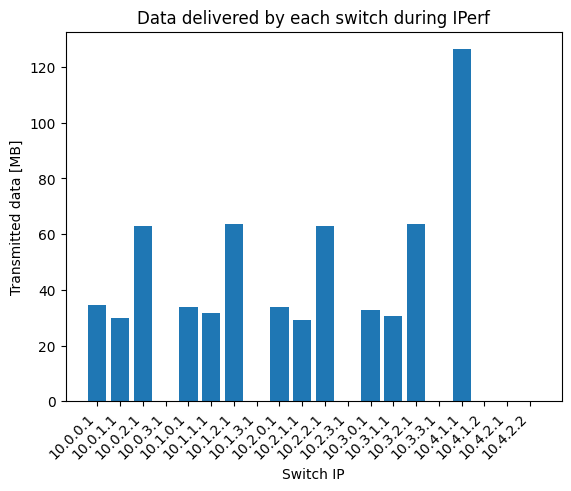

In [3]:
ips = list(sent_bytes_sp.keys())
ips.sort()
total_sent = [sum(sent_bytes_sp[ip].values()) * 1e-6 for ip in ips]
pyplot.bar(range(len(ips)), total_sent, tick_label=[str(ip) for ip in ips])
pyplot.xticks(rotation=45, ha="right")
pyplot.title("Data delivered by each switch during IPerf")
pyplot.xlabel("Switch IP")
pyplot.ylabel("Transmitted data [MB]")